# Galaxy Morphology with SDSS and Astrocut
***

## Learning Goals 
By the end of this tutorial, you will:

- Understand how to use `astroquery.mast` to download the SDSS Legacy Imaging Survey Data from the MAST archive.
- Utilize `astrocut` to create colorized cropped images from 12 different galaxies.
- Construct a Hubble Tuning Fork Diagram from the cropped images to learn about galaxy morphology.

## Table of Contents
* [Introduction](#introduction)
* [Imports](#imports)
* [Accessing SDSS Legacy Imaging Survey Data from MAST](#accessing-sdss-legacy-imaging-survey-data-from-mast)
  * [Querying SDSS Legacy Imaging Survey](#querying-sdss-legacy-imaging-survey)
  * [Gathering Galaxies from the SDSS Legacy Imaging Survey](#gathering-galaxies-from-the-sdss-legacy-imaging-survey)
    * [Elliptical Galaxies](#elliptical-galaxies)
    * [Lenticular Galaxies](#lenticular-galaxies)
    * [Spiral Galaxies](#spiral-galaxies)
    * [Barred Spiral Galaxies](#barred-spiral-galaxies)
    * [Irregular Galaxies](#irregular-galaxies)
  * [Downloading Data Products](#downloading-sdss-legacy-imaging-survey-data-products)
* [Creating the Cutout Images Using Astrocut](#creating-the-cutout-images-using-astrocut)
* [Making the Hubble Tuning Fork Diagram](#making-the-hubble-tuning-fork-diagram)
* [End of Tutorial](#end-of-tutorial)
* [Exercise](#exercise)
* [Exercise Solution](#exercise-solution)
* [Additional Resources](#additional-resources)
* [Citations](#citations)
* [About this Notebook](#about-this-notebook)

## Introduction

<figure style="text-align: center;">
  <img src="https://skyserver.sdss.org/dr1/en/proj/advanced/galaxies/images/TuningFork.jpg" alt="Hubble Tuning Fork Diagram" width="520px" height="475px"/>
  <figcaption>
  Hubble Tuning Fork Diagram
  <a href="https://skyserver.sdss.org/dr1/en/proj/advanced/galaxies/tuningfork.asp" target="_blank">[1].</a>
  </figcaption>
</figure>

In the early 1900s, most astronomers believed objects such as the Andromeda galaxy were nebulous clouds within our galaxy. In 1923, Edwin Hubble proved Andromeda was outside the Milky Way using the period-luminosity relationship with Cepheid variables [[2]](https://lco.global/spacebook/galaxies/history-discovery/). Once Hubble discovered most "nebulae" visible in the sky were actually galaxies, he created a classification scheme known as the *Hubble Tuning Fork*, or the *Hubble Sequence*. Hubble initially separated galaxies into two main groups: elliptical galaxies and spiral galaxies. Elliptical galaxies lack spiral arms, but are ellipses in shape. Hubble classified them by their ellipticity; the more elongated the galaxy, the higher its classification number (i.e. E0 to E7).

Spiral galaxies, which have prominent spiral arms, were further divided into two types based on the presence of a central bar: barred spirals (with a bar) and normal spirals (without). Both types were then categorized as early, intermediate, or late, depending on how tightly wound their arms were. Galaxies that lacked both a central nucleus and spiral structure were classified as "irregular" [[3]](https://adsabs.harvard.edu/pdf/1934ApJ....79....8H).

Hubble initially proposed that galaxies evolved from left to right on his tuning fork diagram, starting at E0 ellipticals and ending at late-type spiral/barred spiral galaxies. However, we now know this to be incorrect! Despite this, the Hubble Sequence remains a widely used tool for galaxy morphological classification [[1]](https://skyserver.sdss.org/dr1/en/proj/advanced/galaxies/tuningfork.asp).

In this notebook, we'll construct our own Hubble Tuning Fork Diagram based on this classification scheme using imaging data from the SDSS Legacy Imaging Survey. We can utilize the `Astrocut` package to crop selected fields and generate color cutouts of various galaxies for our diagram. 


## Imports
The main packages and their use-cases in this tutorial are as follows:
- *numpy* to handle array functions
- *matplotlib.pyplot* for plotting data
- *matplotlib.image* to handle .png images
- *astroquery.mast.Observations* to access SDSS data from MAST
- *astrocut.FITSCutout* to mosaic images
- *astropy* for handling FITS files
- *astropy.table.vstack* for combining Astropy tables
- *warnings* to suppress FITS warnings
- *bz2* to decompress the data files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from astroquery.mast import Observations
from astrocut import FITSCutout
import astropy
from astropy.table import vstack
import warnings
import bz2

If you're not sure if you have the required versions of packages installed on your device, you can run the following cell:

In [2]:
with open("requirements.txt") as f:
    print(f"Required packages for this notebook:\n{f.read()}")

Required packages for this notebook:
numpy >= 1.26.4
matplotlib >= 3.9.1
astroquery >= 0.4.9
astropy >= 5.3
astrocut >= 1.0.1


To ensure these requirements are installed, you can run the following command in the terminal:
```bash
pip install -r requirements.txt
```

***
## Accessing SDSS Legacy Imaging Survey Data from MAST 

The [Mikulski Archive for Space Telescopes (MAST)](https://archive.stsci.edu/) hosts a large array of data from several telescope missions. In this tutorial, we will be specifically focusing on data from the Sloan Digital Sky Survey's (SDSS) Imaging Survey. 

The [SDSS Legacy Imaging Survey](https://www.sdss.org/dr18/imaging/) was the first SDSS survey completed! Beginning in 1998, the SDSS Legacy Imaging Survey captured around 35,000 square degrees of images until 2009, which covers about one-third of the whole sky. To do this, the survey took millions of 10 by 13 arcminute pictures (called "fields"). Not only does the SDSS Legacy Imaging Survey data at MAST provide users with preview images in .jpg format, but it also has photometric data in all five broad band SDSS filters (u, g, r, i, and z). For more information about the data and products from the SDSS Legacy Imaging Survey, you can check out the [SDSS Imaging Archive Manual](https://outerspace.stsci.edu/display/SDSS/Legacy+Imaging). 

### Querying SDSS Legacy Imaging Survey

You can query data from MAST using the [website portal](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html). You can also query MAST data in Python using the module `astroquery.mast`! 

We can query all of the SDSS Legacy Imaging data using the `Observations.query_criteria()` function with the parameter `provenance_name = "SDSS Legacy Imaging"`. Since there is a large amount of data in the SDSS Legacy Imaging archive, we can display the first 10 results using the `pagesize` parameter as well as the `page` parameter.

In [3]:
# Querying SDSS Legacy Imaging
imaging_data = Observations.query_criteria(
    provenance_name="SDSS Legacy Imaging", pagesize=10, page=1
)

# Display first 10 entries
imaging_data

<Table masked=True length=10>
intentType obs_collection   provenance_name   ...  srcDen   obsid     objID  
   str7         str4             str19        ... float64    str9      str9  
---------- -------------- ------------------- ... ------- --------- ---------
   science           SDSS SDSS Legacy Imaging ...     nan 298416061 886141297
   science           SDSS SDSS Legacy Imaging ...     nan 298416062 886141318
   science           SDSS SDSS Legacy Imaging ...     nan 298416063 886141326
   science           SDSS SDSS Legacy Imaging ...     nan 298416064 886141336
   science           SDSS SDSS Legacy Imaging ...     nan 298416065 886141343
   science           SDSS SDSS Legacy Imaging ...     nan 298416066 886141350
   science           SDSS SDSS Legacy Imaging ...     nan 298416067 886141361
   science           SDSS SDSS Legacy Imaging ...     nan 298416068 886141369
   science           SDSS SDSS Legacy Imaging ...     nan 298416069 886141373
   science           SDSS SDSS Legacy Imaging ...     nan 298416070 886141382

The table above provides some basic information for each object:

- `instrument_name`: `SDSS Camera` indicates that the imaging data were collected using the SDSS camera. 
- `filters`: Indicates the SDSS filters used in the survey (u, g, r, i, and z).
- `wavelength_region`: Indicates the region of the electromagnetic spectrum observed. This should be `OPTICAL`, since the SDSS Legacy Imaging Survey observed in the optical wavelength range.
- `target_classification`: `FIELD` indicates the survey captured images of the sky.
- `obs_id`: Observation ID associated with the image. 
- `s_ra` and `s_dec`: Right ascension and declination.
- `dataproduct_type`: This should be `image` since we're focusing on an imaging survey.
- `t_min` and `t_max`: The modified Julian dates indicating the start and end times of the exposures.
- `em_min` and `em_max`: The minimum and maximum wavelengths observed by the survey. For the SDSS Legacy Imaging survey, this range is approximately 304.8 - 1083.3 nanometers (optical).

### Gathering Galaxies from the SDSS Legacy Imaging Survey

In this tutorial, we'll be gathering a variety of galaxies to make a Hubble Tuning Fork Diagram. We'll select the following galaxies:
- Elliptical:
  - M89 (E0)
  - NGC 5982 (E3)
  - NGC 4697 (E6)
- Lenticular:
  - NGC 3384 (S0)
- Spiral:
  - NGC 488 (Sa)
  - M88 (Sb)
  - M99 (Sc)
- Barred Spiral:
  - NGC 109 (SBa)
  - M91 (SBb)
  - NGC 5068 (SBc)
- Irregular:
  - IC 3583
  - NGC 7292

These galaxies were selected based on their [NED](https://ned.ipac.caltech.edu/) classification as well as how they fit in an SDSS field using the [MAST Portal Astroview](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html). 

We can query MAST using the target name directly! We'll use M89 as an example:

In [4]:
# Querying MAST for M89 using search radius of 0
m89 = Observations.query_criteria(
    objectname="M89", radius=0, provenance_name="SDSS Legacy Imaging"
)
# Displaying the results
m89

<Table masked=True length=3>
intentType obs_collection   provenance_name   ...   objID     objID1  distance
   str7         str4             str19        ...    str9      str9   float64 
---------- -------------- ------------------- ... --------- --------- --------
   science           SDSS SDSS Legacy Imaging ... 877110806 877110806      0.0
   science           SDSS SDSS Legacy Imaging ... 878009148 878009148      0.0
   science           SDSS SDSS Legacy Imaging ... 880840069 880840069      0.0

There are three fields available for M89, but we'll be using the field with `target_name=003804-4-0207` since it completely captures the galaxy. For the rest of the tutorial, we'll be querying by target name (field) as we preselected these from the MAST Portal depending on how the galaxy fit into each field. 

#### Elliptical Galaxies

Elliptical galaxies have a distinct nucleus, but do not have a disk or spiral arms. Due to the minimal dust and gas present, these galaxies are mostly made up of [population II stars](https://astronomy.swin.edu.au/cosmos/*/Population+II). Elliptical galaxies are categorized by number, with E0 being the most round in shape, and E7 being the most elliptical in shape. The elliptical galaxy classification numbers are derived from the equation:

$$
n = 10(\frac{b}{a})
$$

where $n$ is the classification number, $b$ is the projected length of the semi-minor axis on the sky, and $a$ is the projected length of the semi-major axis on the sky [[4]](https://astronomy.swin.edu.au/cosmos/*/Elliptical+Galaxy). However, this system is sensitive to the angle at which we observe the galaxy. A galaxy that appears highly elliptical when viewed edge-on may be more circular when viewed face-on. Although this classification scheme remains in use, it's important to remember the limitations imposed by our viewing perspective.

We'll use the following fields for each galaxy: 
- M89 field: `003804-4-0207`
- NGC 5982 field: `004679-1-0034`
- NGC 4697 field: `006121-1-0124`

In [5]:
# Elliptical Galaxies
ellipticals = Observations.query_criteria(
    provenance_name="SDSS Legacy Imaging",
    target_name=[
        "003804-4-0207",  # M89
        "004679-1-0034",  # NGC 5982
        "006121-1-0124",  # NGC 4697
    ],
)
ellipticals

<Table masked=True length=3>
intentType obs_collection   provenance_name   ...  srcDen   obsid     objID  
   str7         str4             str19        ... float64    str9      str9  
---------- -------------- ------------------- ... ------- --------- ---------
   science           SDSS SDSS Legacy Imaging ...     nan 297868245 880840069
   science           SDSS SDSS Legacy Imaging ...     nan 298084026 883250573
   science           SDSS SDSS Legacy Imaging ...     nan 297963442 881902351

#### Lenticular Galaxies

Lenticular galaxies are in-between elliptical and spiral galaxies. They have a central bulge and a disk similar to a spiral galaxy, but lack the spiral arm structure. These galaxies are thought to be former spiral galaxies that lost their interstellar material, likely due to interactions with other galaxies or their environments [[5]](https://astronomy.swin.edu.au/cosmos/L/Lenticular+Galaxy) [[6]](https://science.nasa.gov/universe/galaxies/types/).

We'll use the field `003631-1-0302` for NGC 3384. 

In [6]:
# Lenticular Galaxy
lenticular = Observations.query_criteria(
    provenance_name="SDSS Legacy Imaging",
    target_name="003631-1-0302",  # NGC 3384
)
lenticular

<Table masked=True length=1>
intentType obs_collection   provenance_name   ...  srcDen   obsid     objID  
   str7         str4             str19        ... float64    str9      str9  
---------- -------------- ------------------- ... ------- --------- ---------
   science           SDSS SDSS Legacy Imaging ...     nan 298398508 885964246

#### Spiral Galaxies

Spiral galaxies have distinct spiral arms that protrude from a central bulge of older stars. Within the spiral arms lie stellar "nurseries" of gas and dust that fuel young star formation. Spiral galaxies are classified into *Sa, Sb,* or *Sc* groups based on how tightly wound their spirals are, the thickness of the spiral arms, and the size of the central bulge. *Sa* spirals have large bulges and faint, small spiral arms whereas *Sc* spirals have smaller bulges, but larger, loose spiral arms [[7]](https://astronomy.swin.edu.au/cosmos/S/Spiral+Galaxy).

We'll use the following fields for each galaxy: 
- NGC 488 field: `007727-5-0202`
- M88 field: `004381-2-0114`
- M99 field: `004381-2-0093`

In [7]:
# Spiral Galaxies
spirals = Observations.query_criteria(
    provenance_name="SDSS Legacy Imaging",
    target_name=[
        "007727-5-0202",  # NGC 488
        "004381-2-0114",  # M88
        "004381-2-0093",  # M99
    ],
)
spirals

<Table masked=True length=3>
intentType obs_collection   provenance_name   ...  srcDen   obsid     objID  
   str7         str4             str19        ... float64    str9      str9  
---------- -------------- ------------------- ... ------- --------- ---------
   science           SDSS SDSS Legacy Imaging ...     nan 298352265 885500811
   science           SDSS SDSS Legacy Imaging ...     nan 298351741 885496458
   science           SDSS SDSS Legacy Imaging ...     nan 298036044 882777689

#### Barred Spiral Galaxies

Barred spiral galaxies have a distinct, luminous bar/stripe across their center. This bar is thought to form either from internal dynamical instabilities or from gravitational interactions with neighboring galaxies. Like regular spiral galaxies, they are classified into *SBa, SBb,* and *SBc* types: *SBa* galaxies have tightly wound spiral arms and a larger central bulge, while *SBc* galaxies have loosely wound arms and a smaller bulge. [[8]](https://astronomy.swin.edu.au/cosmos/B/Bars). 

We'll use the following fields for each galaxy: 
- NGC 109 field: `007932-2-0051`
- M91 field: `004381-2-0120`
- NGC 5068 field: `001449-5-0093`

In [8]:
# Barred Spirals
barred_spirals = Observations.query_criteria(
    provenance_name="SDSS Legacy Imaging",
    target_name=[
        "007932-2-0051",  # NGC 109
        "004381-2-0120",  # M91
        "001449-5-0093",  # NGC 5068
    ],
)
barred_spirals

<Table masked=True length=3>
intentType obs_collection   provenance_name   ...  srcDen   obsid     objID  
   str7         str4             str19        ... float64    str9      str9  
---------- -------------- ------------------- ... ------- --------- ---------
   science           SDSS SDSS Legacy Imaging ...     nan 298381053 885786836
   science           SDSS SDSS Legacy Imaging ...     nan 298353167 885509568
   science           SDSS SDSS Legacy Imaging ...     nan 298320511 885204258

#### Irregular Galaxies 

Irregular galaxies are galaxies that do not fit into the elliptical or spiral/barred spiral categories. They typically have chaotic or asymmetric structures, often resulting from violent interactions with other galaxies, collisions, or internal processes. Well-known examples include the Large and Small Magellanic Clouds [[9]](https://astronomy.swin.edu.au/cosmos/I/Irregular+Galaxy). 

We'll use the following fields for each galaxy: 
- IC 3583 field: `003836-5-0268`
- NGC 7292 field: `008115-6-0118`

In [9]:
# Irregular galaxies
irregulars = Observations.query_criteria(
    provenance_name="SDSS Legacy Imaging",
    target_name=[
        "003836-5-0268",  # IC 3583
        "008115-6-0118",  # NGC 7292
    ],
)
irregulars

<Table masked=True length=2>
intentType obs_collection   provenance_name   ...  srcDen   obsid     objID  
   str7         str4             str19        ... float64    str9      str9  
---------- -------------- ------------------- ... ------- --------- ---------
   science           SDSS SDSS Legacy Imaging ...     nan 297915282 881405426
   science           SDSS SDSS Legacy Imaging ...     nan 297726821 879149237

### Downloading SDSS Legacy Imaging Survey Data Products

For each image, there are 7 available products: The preview .jpg image, the FITS files in each respective SDSS filter (u, g, r, i, and z), and a catalog file containing photometric measurements from all five filters combined. The catalog file is listed as `SDSS Imaging Catalogs` for the `productSubGroupDescription` parameter.

For more information about products available at MAST, you can check out the [SDSS Legacy Imaging Survey Documentation](https://outerspace.stsci.edu/display/SDSS/Legacy+Imaging+Data+Products). 

In [10]:
# Combining the Astropy tables for all galaxies
all_galaxies = vstack(
    [ellipticals, lenticular, spirals, barred_spirals, irregulars]
)

# Viewing available products (first 7)
galaxy_products = Observations.get_product_list(all_galaxies)
galaxy_products[:7]

<Table masked=True length=7>
  obsID   obs_collection dataproduct_type ... dataRights calib_level  filters 
   str9        str4           str12       ...    str6       int64       str9  
--------- -------------- ---------------- ... ---------- ----------- ---------
297726821           SDSS            image ...     PUBLIC           3 u;g;r;i;z
297726821           SDSS            image ...     PUBLIC           2         g
297726821           SDSS            image ...     PUBLIC           2         i
297726821           SDSS            image ...     PUBLIC           2         r
297726821           SDSS            image ...     PUBLIC           2         u
297726821           SDSS            image ...     PUBLIC           2         z
297726821           SDSS            image ...     PUBLIC           3 u;g;r;i;z

We'll now download all FITS files, specifically focusing on the files in specific ugriz filters. For this tutorial, we'll be using the g, r, and i filters only, so we can filter those out using the `filters` parameter. 

In [11]:
# Downloading products
manifest = Observations.download_products(
    galaxy_products, mrp_only=True, verbose=False, filters=["g", "r", "i"]
)

INFO: Found cached file ./mastDownload/SDSS/sdss_image_008115-6-0118/frame-g-008115-6-0118.fits.bz2 with expected size 3077536. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_008115-6-0118/frame-i-008115-6-0118.fits.bz2 with expected size 3876498. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_008115-6-0118/frame-r-008115-6-0118.fits.bz2 with expected size 3661286. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_003804-4-0207/frame-g-003804-4-0207.fits.bz2 with expected size 2986179. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_003804-4-0207/frame-i-003804-4-0207.fits.bz2 with expected size 3571359. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_003804-4-0207/frame-r-003804-4-0207.fits.bz2 with expected size 3083697. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_003836-5-0268/frame-g-003836-5-0268.fits.bz2 with expected size 3128869. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_003836-5-0268/frame-i-003836-5-0268.fits.bz2 with expected size 3119980. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_003836-5-0268/frame-r-003836-5-0268.fits.bz2 with expected size 3147869. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_006121-1-0124/frame-g-006121-1-0124.fits.bz2 with expected size 3036601. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_006121-1-0124/frame-i-006121-1-0124.fits.bz2 with expected size 3513999. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_006121-1-0124/frame-r-006121-1-0124.fits.bz2 with expected size 3212269. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_007727-5-0202/frame-g-007727-5-0202.fits.bz2 with expected size 3026470. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_007727-5-0202/frame-i-007727-5-0202.fits.bz2 with expected size 3862314. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_007727-5-0202/frame-r-007727-5-0202.fits.bz2 with expected size 3034328. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_004679-1-0034/frame-g-004679-1-0034.fits.bz2 with expected size 3405007. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_004679-1-0034/frame-i-004679-1-0034.fits.bz2 with expected size 3606430. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_004679-1-0034/frame-r-004679-1-0034.fits.bz2 with expected size 3190817. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_007932-2-0051/frame-g-007932-2-0051.fits.bz2 with expected size 2892867. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_007932-2-0051/frame-i-007932-2-0051.fits.bz2 with expected size 3578789. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_007932-2-0051/frame-r-007932-2-0051.fits.bz2 with expected size 3196035. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_004381-2-0114/frame-g-004381-2-0114.fits.bz2 with expected size 3125179. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_004381-2-0114/frame-i-004381-2-0114.fits.bz2 with expected size 3742961. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_004381-2-0114/frame-r-004381-2-0114.fits.bz2 with expected size 3243122. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_004381-2-0093/frame-g-004381-2-0093.fits.bz2 with expected size 2957590. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_004381-2-0093/frame-i-004381-2-0093.fits.bz2 with expected size 3540737. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_004381-2-0093/frame-r-004381-2-0093.fits.bz2 with expected size 3125591. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_004381-2-0120/frame-g-004381-2-0120.fits.bz2 with expected size 3037577. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_004381-2-0120/frame-i-004381-2-0120.fits.bz2 with expected size 3674742. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_004381-2-0120/frame-r-004381-2-0120.fits.bz2 with expected size 3118318. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_001449-5-0093/frame-g-001449-5-0093.fits.bz2 with expected size 3249674. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_001449-5-0093/frame-i-001449-5-0093.fits.bz2 with expected size 3704885. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_001449-5-0093/frame-r-001449-5-0093.fits.bz2 with expected size 3440363. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_003631-1-0302/frame-g-003631-1-0302.fits.bz2 with expected size 3226342. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_003631-1-0302/frame-i-003631-1-0302.fits.bz2 with expected size 3423721. [astroquery.query]


INFO: Found cached file ./mastDownload/SDSS/sdss_image_003631-1-0302/frame-r-003631-1-0302.fits.bz2 with expected size 3234965. [astroquery.query]


Each FITS file follows the following naming scheme: `frame-{filter}-{RUN}-{CAMCOL}-{FIELD}` where `RUN` is the zero-padded, six-digit identification number for that photometric run, `CAMCOL` is the camera column identifying the scanline within the run, and `FIELD` is field number for that observation. 

While we won't be using the photoObj files in this tutorial, these contain the fully calibrated outputs from the [SDSS Imaging Pipeline](https://www.sdss4.org/dr17/imaging/pipeline/) and other respective measurements such as photometry in all five SDSS filters (u, g, r, i, and z), source classification, and quality flags. There is one photoObj file for each run-camcol-field combination. 

## Creating the Cutout Images Using Astrocut

Now that we downloaded the FITS files for each galaxy, we can use `Astrocut` to trim the images and create cutouts! 

Astrocut uses FITS files and specified center coordinates to create a trimmed image. We'll create a dictionary of galaxy names, their target names, and center coordinates. For more information about `Astrocut`, you can view the [documentation](https://astrocut.readthedocs.io/en/latest/astrocut/index.html).

We'll use `warnings.filterwarnings` to suppress FITS warnings due to the change in keyword names since SDSS data was created.

Each Astrocut image cell takes a few seconds to run!

In [12]:
# Suppressing FITS warnings
warnings.filterwarnings("ignore", category=astropy.wcs.FITSFixedWarning)

In order to center the galaxy in our cutout, we need to know the center coordinates! We can use `astroquery` to resolve the coordinates for each galaxy using `Observations.resolve_object`. We'll now make a dictionary to code in the field ID and coordinates per galaxy. 

In [13]:
# Making a dictionary for galaxy names with MAST target names and coordinates
galaxies = {
    "m89": {
        "id": "003804-4-0207",
        "coord": Observations.resolve_object("m89"),
    },
    "ngc5982": {
        "id": "004679-1-0034",
        "coord": Observations.resolve_object("ngc5982"),
    },
    "ngc4697": {
        "id": "006121-1-0124",
        "coord": Observations.resolve_object("ngc4697"),
    },
    "ngc3384": {
        "id": "003631-1-0302",
        "coord": Observations.resolve_object("ngc3384"),
    },
    "ngc488": {
        "id": "007727-5-0202",
        "coord": Observations.resolve_object("ngc488"),
    },
    "m88": {
        "id": "004381-2-0114",
        "coord": Observations.resolve_object("m88"),
    },
    "m99": {
        "id": "004381-2-0093",
        "coord": Observations.resolve_object("m99"),
    },
    "ngc109": {
        "id": "007932-2-0051",
        "coord": Observations.resolve_object("ngc109"),
    },
    "m91": {
        "id": "004381-2-0120",
        "coord": Observations.resolve_object("m91"),
    },
    "ngc5068": {
        "id": "001449-5-0093",
        "coord": Observations.resolve_object("ngc5068"),
    },
    "ic3583": {
        "id": "003836-5-0268",
        "coord": Observations.resolve_object("ic3583"),
    },
    "ngc7292": {
        "id": "008115-6-0118",
        "coord": Observations.resolve_object("ngc7292"),
    },
}

In [14]:
# Creating a function to locate files from download, find the r, g, and i files
def get_files_for_galaxy(galaxy_name):
    """
    Finds the files based on galaxy name and returns their r, g, and i FITS files
    """

    # Finding the file by galaxy name
    galaxy_mask = (
        np.char.find(
            manifest["Local Path"].astype(str), galaxies[galaxy_name]["id"]
        )
        >= 0
    )
    files = np.array(manifest["Local Path"][galaxy_mask], dtype=str)

    # Decompressing the files
    fits_files = np.array([], dtype=str)
    for file in files:
        fits_filename = file.replace('.bz2', '')
        fits_files = np.append(fits_files, fits_filename)
        with bz2.open(file, 'rb') as compressed_file:
            with open(fits_filename, 'wb') as decompressed_file:
                decompressed_file.write(compressed_file.read())

    # Finding the r, g, and i files
    rmask = np.char.find(fits_files, "frame-r") >= 0
    gmask = np.char.find(fits_files, "frame-g") >= 0
    imask = np.char.find(fits_files, "frame-i") >= 0

    r_file = fits_files[rmask]
    g_file = fits_files[gmask]
    i_file = fits_files[imask]

    return i_file[0], r_file[0], g_file[0]

In [15]:
# Helper function for creating cutout images
def create_cutouts(galaxy_name, cutout_size):
    """
    This function takes the name of the galaxy and size of the cutout,
    creates cutout using Astrocut, then plots the image using matplotlib
    """

    # Using previous function to get the r, g, and i files
    galaxy_input = get_files_for_galaxy(galaxy_name)

    # Creating the cutouts
    galaxy_colorimage = FITSCutout(
        galaxy_input, galaxies[galaxy_name]["coord"], cutout_size
    ).get_image_cutouts(colorize=True)[0]
    galaxy_colorimage.save(f"{galaxy_name}_cutout.png")

    # Capitalizing the title
    title_name = np.char.upper(galaxy_name)

    # Displaying the cutouts
    plt.figure(figsize=(5, 5))
    plt.imshow(galaxy_colorimage)
    plt.title(f"Cutout of {title_name}")
    plt.show()

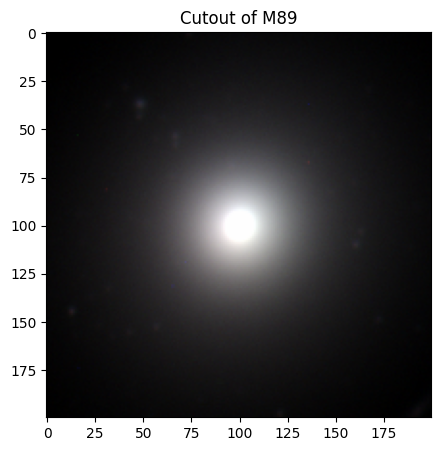

In [16]:
# M89
# Creating and displaying the cutout image of M89!
m89_img = create_cutouts("m89", [200, 200])

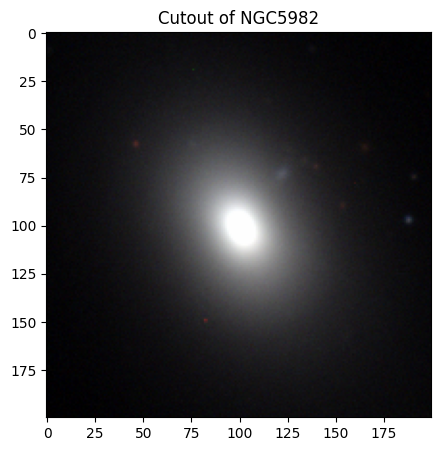

In [17]:
# NGC 5982
# Creating and displaying the cutout image of NGC 5982!
ngc5982_img = create_cutouts("ngc5982", [200, 200])

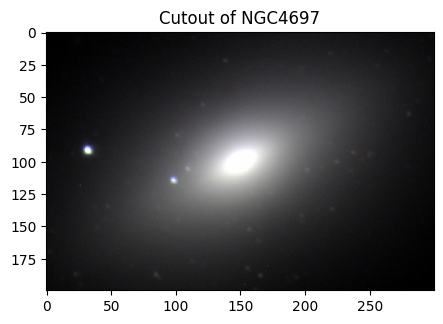

In [18]:
# NGC 4697
# Creating and displaying the cutout image of NGC 4697!
ngc4697_img = create_cutouts("ngc4697", [300, 200])

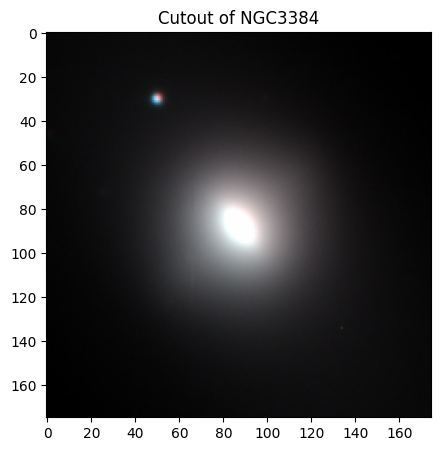

In [19]:
# NGC 3384
# Creating and displaying the cutout image of NGC 3384!
ngc3384_img = create_cutouts("ngc3384", [175, 175])

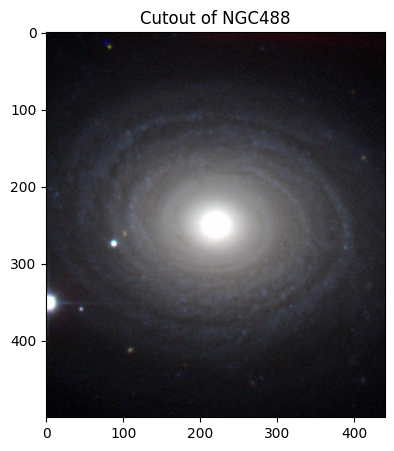

In [20]:
# NGC 488
# Creating and displaying the cutout image of NGC 488!
ngc488_img = create_cutouts("ngc488", [440, 500])

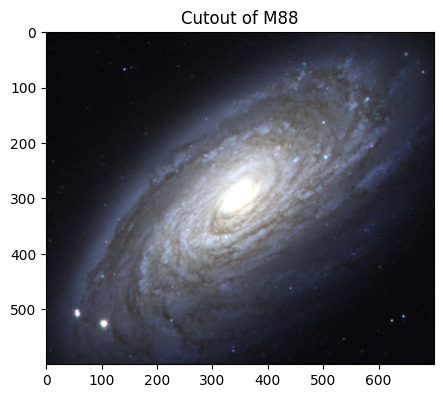

In [21]:
# M88
# Creating and displaying the cutout image of M88!
m88_img = create_cutouts("m88", [700, 600])

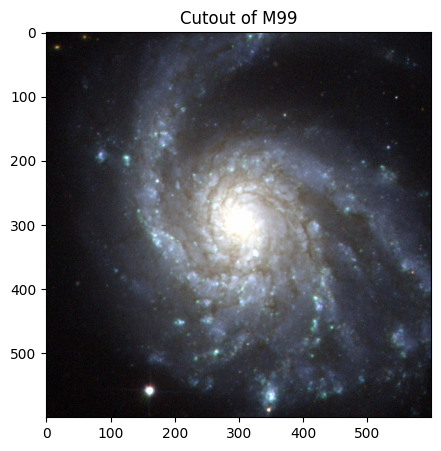

In [22]:
# M99
# Creating and displaying the cutout image of M99!
m99_img = create_cutouts("m99", [600, 600])

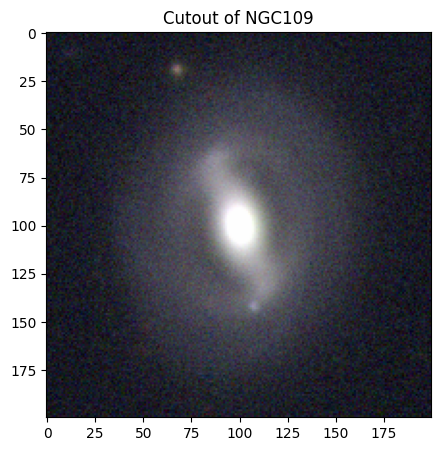

In [23]:
# NGC 109
# Creating and displaying the cutout image of NGC 109!
ngc109_img = create_cutouts("ngc109", [200, 200])

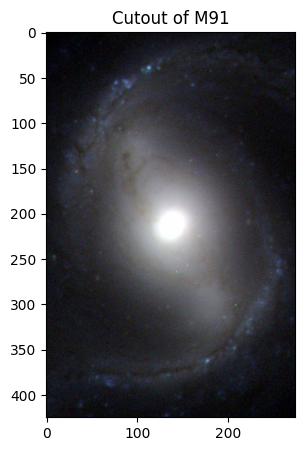

In [24]:
# M91
# Creating and displaying the cutout image of M91!
m91_img = create_cutouts("m91", [275, 425])

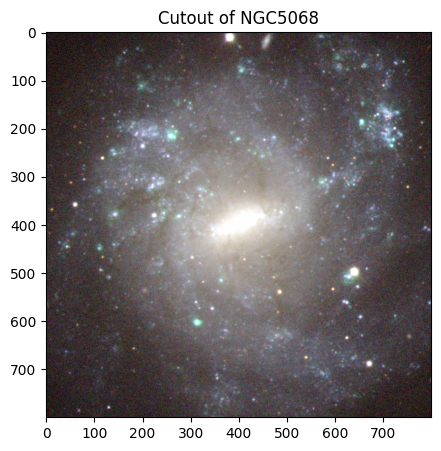

In [25]:
# NGC 5068
# Creating and displaying the cutout image of NGC 5068!
ngc5068_img = create_cutouts("ngc5068", [800, 800])

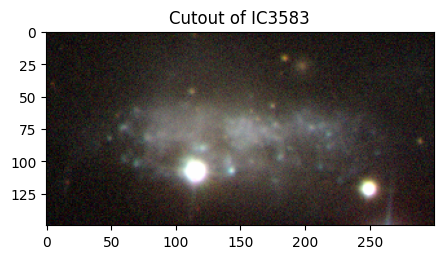

In [26]:
# IC 3583
# Creating and displaying the cutout image of IC 3583!
ic3583_img = create_cutouts("ic3583", [300, 150])

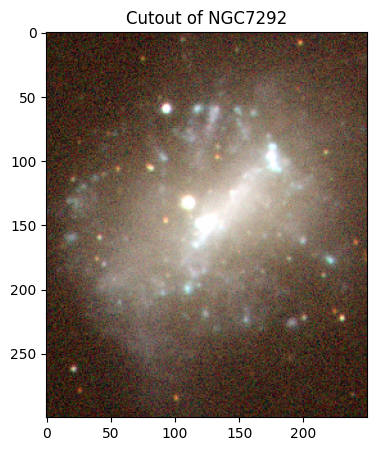

In [27]:
# NGC 7292
# Creating and displaying the cutout image of NGC 7292!
ngc7292_img = create_cutouts("ngc7292", [250, 300])

## Making the Hubble Tuning Fork Diagram

Now that we have our cutouts saved as .png files, we can create our Hubble Tuning Fork Diagram using `matplotlib.image` and a series of subplots!

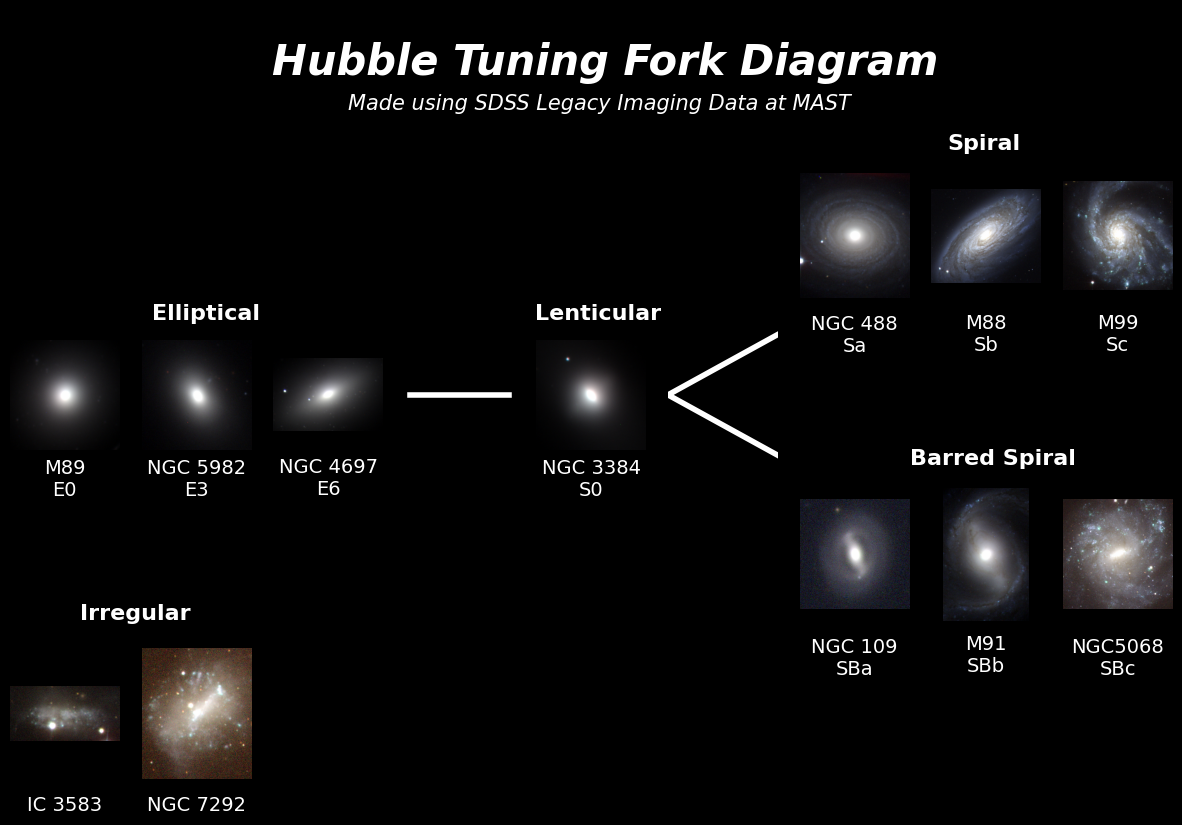

In [28]:
# Creating subplots
fig, ax = plt.subplots(nrows=5, ncols=9, figsize=(15, 10), facecolor="black")
for row in ax:
    for a in row:
        a.axis("off")

# Reading the cutout images
images = {}
for galaxy in galaxies.keys():
    images[galaxy] = mpimg.imread(f"{galaxy}_cutout.png")

# Ading connecting lines
# Straight line
x = np.linspace(0, 10, 11)
y1 = 5 * np.ones(11)


# Plotting the images and lines
# Plotting the elliptical galaxies in the center left
ax[2, 0].imshow(images["m89"])
ax[2, 0].set_title("M89\nE0", y=-0.5, color="white", fontsize=14)
ax[2, 1].imshow(images["ngc5982"])
ax[2, 1].set_title("NGC 5982\nE3", y=-0.5, color="white", fontsize=14)
ax[2, 2].imshow(images["ngc4697"])
ax[2, 2].set_title("NGC 4697\nE6", y=-0.98, color="white", fontsize=14)

# Plotting the connecting straight line
ax[2, 3].plot(x, y1, color="white", lw=4)

# Plotting the lenticular galaxy between the ellipticals and spirals
ax[2, 4].imshow(images["ngc3384"])
ax[2, 4].set_title("NGC 3384\nS0", y=-0.5, color="white", fontsize=14)

# Plotting the connecting v line
ax[2, 5].plot((lambda x: np.abs(x - 5))(x), x, color="white", lw=4)
ax[2, 5].set_xlim(0, 5)

# Plotting the spiral galaxies in the top right
ax[1, 6].imshow(images["ngc488"])
ax[1, 6].set_title("NGC 488\nSa", y=-0.5, color="white", fontsize=14)
ax[1, 7].imshow(images["m88"])
ax[1, 7].set_title("M88\nSb", y=-0.82, color="white", fontsize=14)
ax[1, 8].imshow(images["m99"])
ax[1, 8].set_title("M99\nSc", y=-0.63, color="white", fontsize=14)

# Plotting the barred spirals in the bottom right
ax[3, 6].imshow(images["ngc109"])
ax[3, 6].set_title("NGC 109\nSBa", y=-0.68, color="white", fontsize=14)
ax[3, 7].imshow(images["m91"])
ax[3, 7].set_title("M91\nSBb", y=-0.45, color="white", fontsize=14)
ax[3, 8].imshow(images["ngc5068"])
ax[3, 8].set_title("NGC5068\nSBc", y=-0.68, color="white", fontsize=14)

# Plotting the irregular galaxies in the bottom left
ax[4, 0].imshow(images["ic3583"])
ax[4, 0].set_title("IC 3583", y=-1.43, color="white", fontsize=14)
ax[4, 1].imshow(images["ngc7292"])
ax[4, 1].set_title("NGC 7292", y=-0.3, color="white", fontsize=14)

# Adding labels
fig.text(
    0.3,
    0.815,
    "Hubble Tuning Fork Diagram",
    fontsize=30,
    fontstyle="oblique",
    fontweight="bold",
    color="white",
)
fig.text(
    0.35,
    0.78,
    "Made using SDSS Legacy Imaging Data at MAST",
    fontsize=15,
    fontstyle="oblique",
    # fontweight="bold",
    color="white",
)
fig.text(
    0.22, 0.57, "Elliptical", color="white", fontsize=16, fontweight="bold"
)
fig.text(
    0.475, 0.57, "Lenticular", color="white", fontsize=16, fontweight="bold"
)
fig.text(0.75, 0.74, "Spiral", color="white", fontsize=16, fontweight="bold")
fig.text(
    0.725,
    0.425,
    "Barred Spiral",
    color="white",
    fontsize=16,
    fontweight="bold",
)
fig.text(
    0.172, 0.27, "Irregular", color="white", fontsize=16, fontweight="bold"
)

plt.show()

***
## End of Tutorial

Congratulations, you've reached the end of this notebook! You've learned how to use `astroquery.mast` and `astrocut` to create a Hubble Tuning Fork Diagram!

*** 
## Exercise

Can you classify these three galaxies referencing the Hubble Tuning Fork Diagram you constructed above?:
- M95
- NGC 4125 
- M74

To choose the right field, you can look at the AstroView on the [MAST Portal](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html).

*(Hint: You can download just the preview image by using `Observations.filter_products` and adding the argument `productType="PREVIEW"`)*

In [29]:
# Query and download data from MAST

In [30]:
# View preview images

***
## Exercise Solution

In [31]:
# Query and download data from MAST
# Querying MAST
exercise_galaxies = Observations.query_criteria(
    provenance_name="SDSS Legacy Imaging",
    target_name=["003836-4-0084", "006118-3-0168", "007845-2-0104"],
)
# Get product list for query
exercise_products = Observations.get_product_list(exercise_galaxies)
# Filter products to get preview jpgs only
filtered_products = Observations.filter_products(
    exercise_products,
    # Selecting preview jpgs
    productType="PREVIEW",
)
# Download products
Observations.download_products(filtered_products, flat=True, verbose=False)

INFO: Found cached file ./frame-irg-006118-3-0168.jpg with expected size 988026. [astroquery.query]


INFO: Found cached file ./frame-irg-003836-4-0084.jpg with expected size 1047832. [astroquery.query]


INFO: Found cached file ./frame-irg-007845-2-0104.jpg with expected size 1177388. [astroquery.query]


<Table length=3>
          Local Path           Status  Message  URL  
            str29               str8    object object
----------------------------- -------- ------- ------
./frame-irg-006118-3-0168.jpg COMPLETE    None   None
./frame-irg-003836-4-0084.jpg COMPLETE    None   None
./frame-irg-007845-2-0104.jpg COMPLETE    None   None

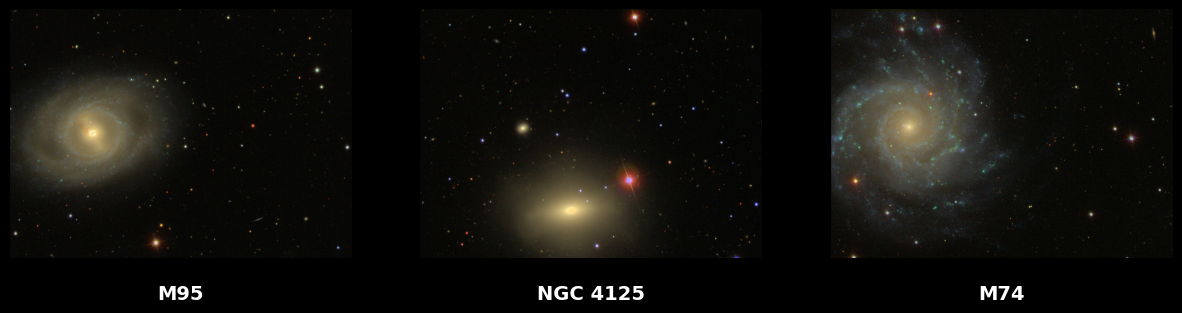

In [32]:
# Viewing the previews side-by-side
fig2, ax2 = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), facecolor="black")
for a in ax2:
    a.axis("off")

# Reading images
img1 = mpimg.imread("frame-irg-003836-4-0084.jpg")
img2 = mpimg.imread("frame-irg-006118-3-0168.jpg")
img3 = mpimg.imread("frame-irg-007845-2-0104.jpg")

# Plotting images
ax2[0].imshow(img1)
ax2[0].set_title("M95", color="white", y=-0.2, fontsize=14, fontweight="bold")
ax2[1].imshow(img2)
ax2[1].set_title(
    "NGC 4125", color="white", y=-0.2, fontsize=14, fontweight="bold"
)
ax2[2].imshow(img3)
ax2[2].set_title("M74", color="white", y=-0.2, fontsize=14, fontweight="bold")

plt.show()

*Assumptions:*
- It appears that M95 is fairly similar to NGC 109 and M91; this must be a barred spiral galaxy! While the spiral arms are somewhat tight, M95 is most likely between an SBa and an SBb.
- NGC 4125 does not have spiral arms or dust lanes, so it must be elliptical. Since elliptical galaxies are classified by their ellipticity, NGC 4125 is likely between an E3 and an E6.
- M74 has distinct spiral arms, but no visible bar. The spiral arms are fairly loose, but not as loose as M99. M74 is likely between an Sb and an Sc galaxy. 

*Results from [NED](https://ned.ipac.caltech.edu/byname):*
- M95: SBb
- NGC 4125: E6
- M74: Sc

***
## Additional Resources

Additional resources are linked below:
- [SDSS Legacy Archive at MAST](https://archive.stsci.edu/missions-and-data/sdss)
- [SDSS Legacy Archive at MAST User Manual](https://outerspace.stsci.edu/display/SDSS/The+SDSS+Legacy+Archive+at+MAST)
- [SDSS Legacy Imaging Archive User Manual](https://outerspace.stsci.edu/display/SDSS/Legacy+Imaging)
- [SDSS Imaging Documentation](https://www.sdss.org/dr18/imaging/)
- [SDSS Hubble Tuning Fork Tutorial](https://skyserver.sdss.org/dr1/en/proj/advanced/galaxies/tuningfork.asp)
- [astroquery.mast User Manual](https://astroquery.readthedocs.io/en/latest/mast/mast.html)
- [MAST API](https://mast.stsci.edu/api/v0/index.html)
- [Astrocut Documentation](https://astrocut.readthedocs.io/en/latest/astrocut/index.html)

## Citations

If you use data from MAST for published research, please see the following links for information on which citations to include in your paper:

* [Citing SDSS](https://sdss.org/collaboration/citing-sdss/)
* [Citing MAST](https://archive.stsci.edu/publishing/mission-acknowledgements)
* [Citing astropy](https://www.astropy.org/acknowledging.html)

## About this Notebook

**Author(s):** Natalie Haugen (nhaugen@terpmail.umd.edu) and Julie Imig (jimig@stsci.edu) <br>
**Keyword(s):** Tutorial, SDSS, SDSS Legacy Imaging Survey, galaxies, galaxy morphology <br>
**First published:** July 2025 <br>
**Last updated:** July 2025 <br>

***
[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/style-guides/master/guides/images/stsci-logo.png" alt="Space Telescope Logo" width="200px"/>